## 12. Time Series Models of Heteroscedascity

**Exercise 12.1**.  Display the time sequence plot of the absolute returns for the CREF data.  Repeat the plot with the squared returns. Comment on the volatility patterns observed in these plots.  (The data are in file named `CREF`.)

**Solution**.

In [1]:
require(ggplot2)
require(data.table)

Loading required package: ggplot2

Loading required package: data.table



In [2]:
Y <- fread('../data/CREF.dat')[['CREF']]

logY = log(Y)
r = logY[-1] - logY[-(length(Y))]

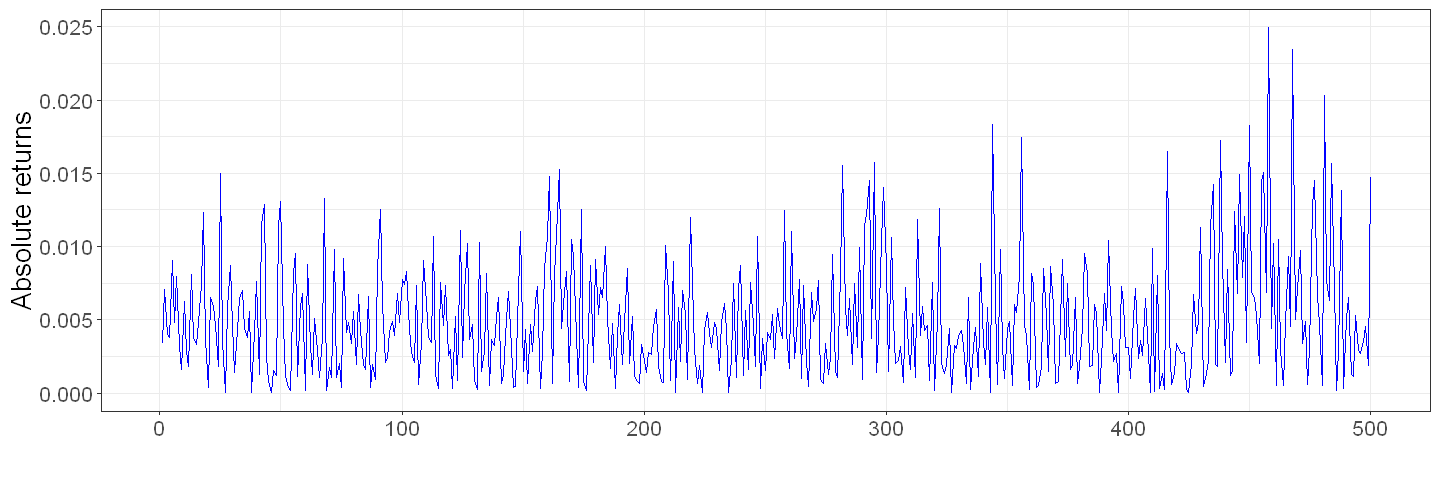

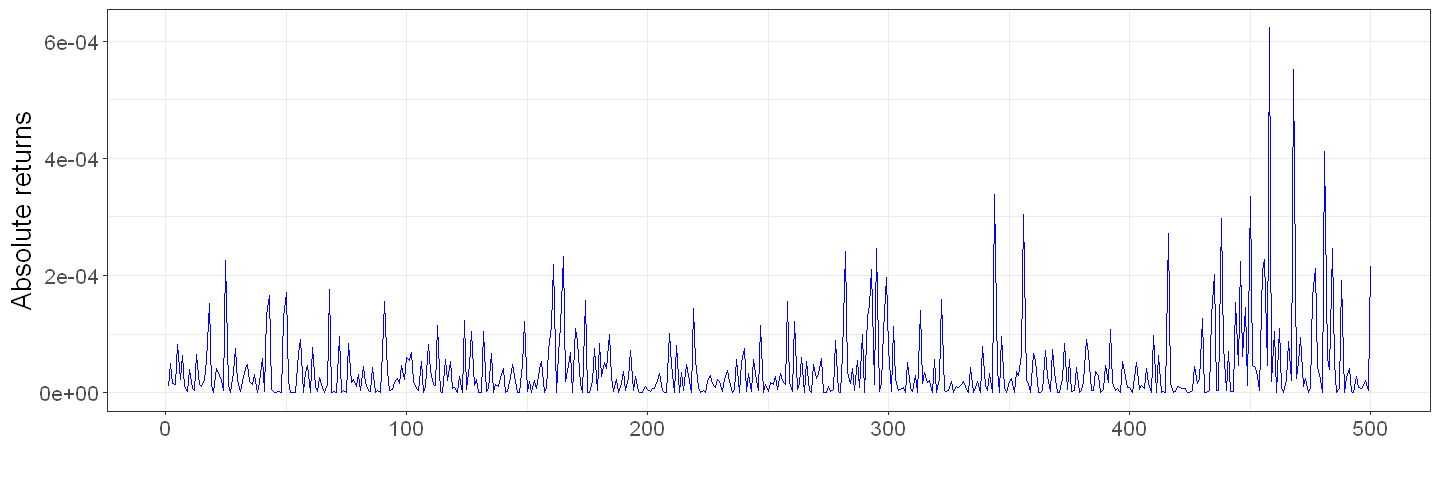

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x = 1:length(r), y = abs(r)), color="blue") + 
  xlab('') + ylab('Absolute returns') +
  theme_bw() + theme(text = element_text(size=16))

ggplot() + 
  geom_line(aes(x = 1:length(r), y = r**2), color="blue") + 
  xlab('') + ylab('Absolute returns') +
  theme_bw() + theme(text = element_text(size=16))

Volatility clustering can be observed in both plots, though it is visually more obvious on the squared returns plot.

**Exercise 12.2**.  Plot the time sequence plot of the absolute returns for the USD/HKD exchange rate data.  Repeat the plot with the squared returns.  Comment on the volatility patterns observed in these plots.  (The data are in the file named `usd.hkd`.)

In [4]:
r <- fread('../data/usd.hkd.dat')[['r']]

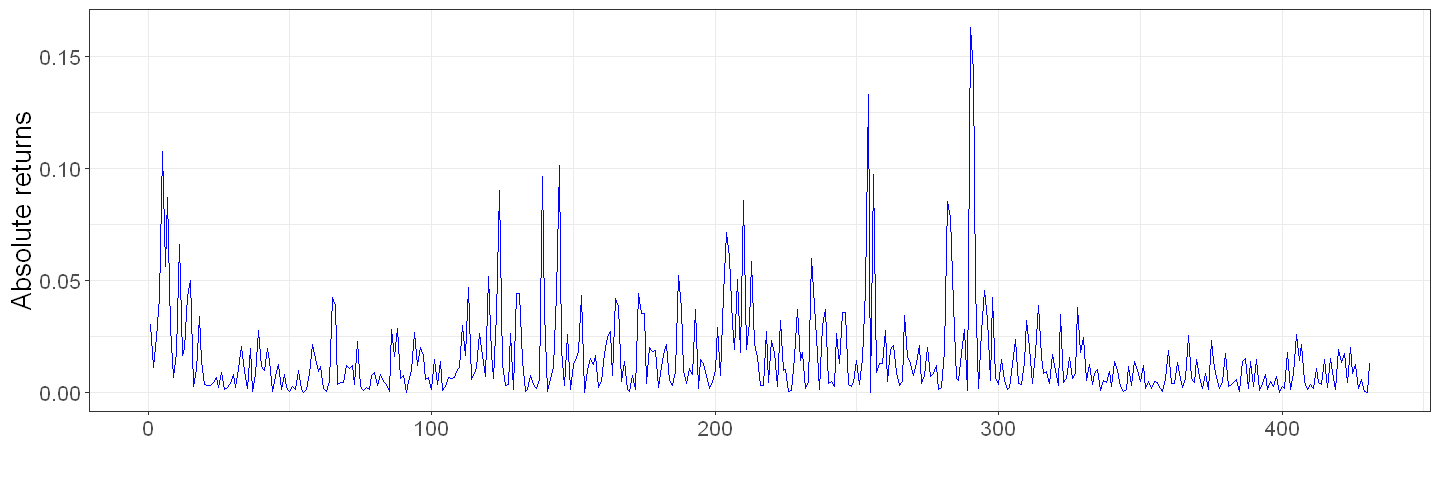

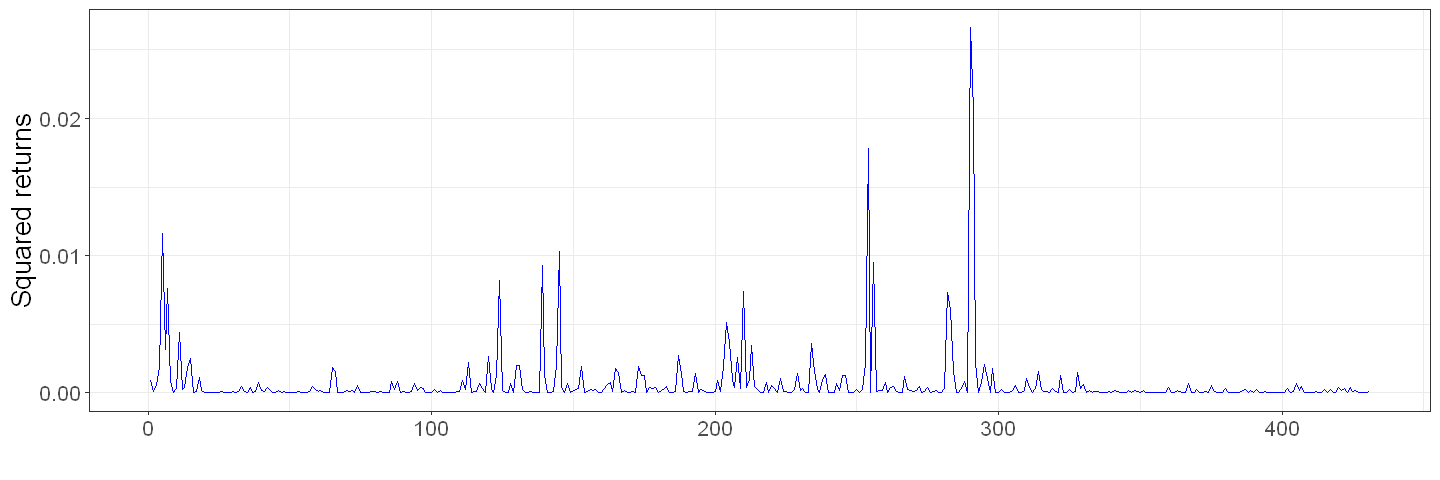

In [5]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot() + 
  geom_line(aes(x = 1:length(r), y = abs(r)), color="blue") + 
  xlab('') + ylab('Absolute returns') +
  theme_bw() + theme(text = element_text(size=16))

ggplot() + 
  geom_line(aes(x = 1:length(r), y = r**2), color="blue") + 
  xlab('') + ylab('Squared returns') +
  theme_bw() + theme(text = element_text(size=16))

Volatility clustering is evident in both charts.

**Exercise 12.3**.  Use the definition $\eta_t = r_t^2 - \sigma_{t | t - 1}^2$ \[Equation (12.2.4) on page 287\] and show that $\{ \eta_t \}$ is a serially uncorrelated sequence.  Show also that $\eta_t$ is uncorrelated with past squared returns, that is, show that $\text{Corr}[\eta_t, r^2_{t - k}] = 0$ for $k > 0$.

**Solution**.  We have:

$$ 
\begin{align}
\text{E}[\eta_t] &= \text{E}[r_t^2 - \sigma_{t | t-1}^2] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1)] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 \cdot 0 ] \\
&= 0
\end{align}
$$

and for $k > 0$

$$ 
\begin{align}
\text{E}[\eta_t \eta_{t - k}] &= \text{E}[(r_t^2 - \sigma_{t | t-1}^2)(r_{t-k}^2 - \sigma_{t - k | t-k-1}^2)] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) \cdot (r_{t-k}^2 - \sigma_{t - k | t-k-1}^2)] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) (\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 - \sigma_{t - k | t-k-1}^2) \cdot 0 ] \\
&= 0
\end{align}
$$

Therefore,

$$ \text{Cov}[\eta_t, \eta_{t - k}] = \text{E}[\eta_t \eta_{t - k}] - \text{E}[\eta_t] \text{E}[\eta_{t-k}] = 0 $$

and so the $\{ \eta_t \}$ is serially uncorrelated.

We also have

$$ 
\begin{align}
\text{E}[\eta_t r_{t - k}^2] &= \text{E}[(r_t^2 - \sigma_{t | t-1}^2) r_{t-k}^2] \\
&= \text{E}[\sigma_{t | t-1}^2(\varepsilon_t^2 - 1) \cdot r_{t-k}^2 ] \\
&= \text{E}[\text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 (\varepsilon_t^2 - 1) | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 \text{E}[\varepsilon_t^2 - 1 | r_{t - 1}, r_{t - 2}, \cdots ]] \\
&= \text{E}[\sigma_{t | t-1}^2 r_{t-k}^2 \cdot 0 ] \\
&= 0
\end{align}
$$

and so

$$ \text{Cov}[\eta_t, r_{t - k}^2] = \text{E}[\eta_t r_{t - k}^2] - \text{E}[\eta_t] \text{E}[r_{t-k}^2] = 0 $$

which is the desired result.

**Exercise 12.4**.  Substituting $\sigma_{t | t - 1}^2 = r_t^2 - \eta_t$ into Equation (12.2.2) on page 285 show the algebra that leads to Equation (12.2.5) on page 287.

**Solution**.  Equation (12.2.2) states

$$ \sigma_{t | t - 1}^2 = \omega + \alpha r_{t-1}^2 \tag{12.2.2} $$

The result follows immediately when replacing $\sigma_{t | t - 1}^2 = r_t^2 - \eta_t$ and adding $\eta_t$ to both sides,

$$ r_t^2 = \omega + \alpha r_{t-1}^2 + \eta_t \tag{12.2.5} $$

**Exercise 12.5**.  Verify Equation (12.2.8) on page 288.

**Solution**.  Equation (12.2.8) states

$$ \tau = \omega^2 + 2 \omega \alpha \sigma^2 + \alpha^2 3 \tau \tag{12.2.8} $$

Following the procedure of raising both sides of Equation (12.2.2) to the second power and taking expectation, we get

$$ \text{E}[\sigma_{t | t - 1}^4] = \text{E}[\omega^2 + 2 \alpha \omega r_{t-1}^2 + \alpha^2 r_{t-1}^4] $$

Using Equation (12.2.7), which states that $\text{E}[r_{t-1}^4] = 3 \tau$, we get

$$ \tau = \text{E}[\sigma_{t | t - 1}^4] = \omega^2 + 2 \alpha \omega \text{E}[r_{t-1}^2] + 3 \alpha^2 \tau $$

and from $\text{E}[r_{t-1}^2] = \sigma^2$ we get our result.

**Exercise 12.6**.  Without doing any theoretical calculations, order the kurtosis values of the following four distributions in ascending order: the t-distribution with 10 DF, the t-distribution with 30 DF, the uniform distribution on \[−1,1\], and the normal distribution with mean 0 and variance 4.  Explain your answer.

**Solution**.  The order is:

- Uniform distribution on \[-1, 1\]
- Normal distribution with mean 0 and variance 4
- t-distribution with 30 DF
- t-distribution with 10 DF

Kurtosis measures how "heavy" the tails of a distribution are.  The uniform distribution has no "tails" at all, as the PDF goes to zero outside of an interval, and the t-distribution has heavier tails than the normal distribution, with it becoming wider with smaller number of degrees of freedom.

**Exercise 12.7**.  Simulate a GARCH(1,1) process with α = 0.1 and β = 0.8 and of length 500. Plot the time series and inspect its sample ACF, PACF, and EACF. Are the data consistent with the assumption of white noise?

**(a)** Square the data and identify a GARCH model for the raw data based on the sample ACF, PACF, and EACF of the squared data.

**(b)** Identify a GARCH model for the raw data based on the sample ACF, PACF and EACF of the absolute data. Discuss and reconcile any discrepancy between the tentative model identified with the squared data and that with the absolute data.

**(c)** Perform the McLeod-Li test on your simulated series. What do you conclude?

**(d)** Repeat the exercise but now using only the first 200 simulated data. Discuss your findings.